In [1]:
import pandas as pd
import nltk

In [2]:
dataset = "Twitter US Airline Sentiment dataset"

In [3]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv(f'../Datasets/Raw/{dataset}/data.csv')

In [5]:
data.sample(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
404,568195292803129345,positive,1.0000,NaN,NaN,Virgin America,NaN,mirandahaustin,NaN,0,@VirginAmerica this is too cool! Never been o...,NaN,2015-02-18 15:48:09 -0800,"Austin, TX",Central Time (US & Canada)
1820,569569639543541762,negative,1.0000,Customer Service Issue,0.6454,United,NaN,Jim_Rehbein,NaN,0,"@united @czamkoff It's all about profit, and t...",NaN,2015-02-22 10:49:18 -0800,"Ottawa, Ontario",Eastern Time (US & Canada)
5496,568946502615179264,negative,0.6544,Flight Booking Problems,0.3291,Southwest,NaN,LukeGUlrich,NaN,0,@SouthwestAir it says I can't because my fligh...,"[41.30091858, -95.89873244]",2015-02-20 17:33:11 -0800,"Omaha, NE",Central Time (US & Canada)
8765,567864058742845440,negative,1.0000,Customer Service Issue,1.0000,Delta,NaN,Analystdoc,NaN,0,@JetBlue Why not just take her info in the beg...,NaN,2015-02-17 17:51:56 -0800,"Greenwich, CT",NaN
7627,569496729755652098,neutral,0.6316,NaN,0.0000,Delta,NaN,MegBurns,NaN,0,@JetBlue on flight 622 from Nassau to JFK. Not...,"[25.05152514, -77.46620117]",2015-02-22 05:59:35 -0800,"west hartford, connecticut",Eastern Time (US & Canada)


In [6]:
data.shape

(14640, 15)

In [7]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [8]:
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [9]:
data.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

In [10]:
data['TEXT'] = None

In [11]:
from Preprocessor import preprocess

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
field = "text"

In [13]:
data = data.drop(columns=['tweet_id','airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold','name','negativereason_gold','retweet_count','tweet_coord','tweet_created','tweet_location','user_timezone'])

In [14]:
data['CLASS']=None
for i in range(len(data[field])):
    if data['airline_sentiment'][i]=="neutral":
        data['CLASS'][i]=0
    elif data['airline_sentiment'][i]=="negative":
        data['CLASS'][i]=-1
    else:
        data['CLASS'][i]=1

In [15]:
data=data.drop(columns=['airline_sentiment'])

In [16]:
for i in range(len(data[field])):
    data['TEXT'][i] = preprocess(data[field][i])

In [17]:
data.sample(5)

,text,TEXT,CLASS
4459,@SouthwestAir: Tried for VIP Live in The Viney...,southwestair tri vip live vineyard yr site wen...,-1
10419,@usairways you mean 10:30pm. I'd be in vegas b...,usairway mean pm vega allow origin flight,-1
4469,@SouthwestAir I called the 800 # and the rep t...,southwestair call rep pleasant le help told so...,-1
4554,@SouthwestAir Looks like brooding skies out of...,southwestair look like brood sky ont even http...,0
12953,@AmericanAir that's why I'm asking for excepti...,americanair ask except staffer move last minut...,-1


In [18]:
data.isna().sum()

text     0
TEXT     0
CLASS    0
dtype: int64

In [19]:
data=data.drop(columns=['text'])

In [20]:
data.nunique()

TEXT     14249
CLASS        3
dtype: int64

In [21]:
import os

target_directory = f'../datasets/Preprocessed/{dataset}'

os.makedirs(target_directory, exist_ok=True)

data.to_csv(os.path.join(target_directory, 'data.csv'))


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
!pip install wordcloud

In [27]:
from wordcloud import WordCloud

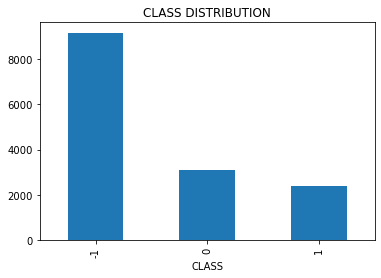

In [28]:
data.groupby('CLASS')['CLASS'].count().plot.bar()
plt.title('CLASS DISTRIBUTION')
plt.show()

In [29]:
for value in data['CLASS'].unique():
    text = ' '.join(x for x in data[data['CLASS'] == value]['TEXT'])
    wordcloud = WordCloud(background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'WORD CLOUD CLASS: {value}')
    plt.show()

ValueError: Only supported for TrueType fonts